In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import itertools

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


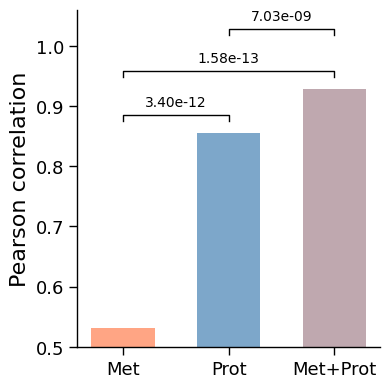

In [ ]:
# Read CSV file containing model comparison data
# Expected columns: Model names, average Pearson correlations (r-AVG), and individual run results (r1-r5)
df = pd.read_csv('../data/2.Prot+Met-Prot-Met-com.csv')

# Convert numeric columns to float type, coercing non-numeric values to NaN
for col in ['r1', 'r2', 'r3', 'r4', 'r5']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for and handle NaN values in the correlation data
if df[['r1', 'r2', 'r3', 'r4', 'r5']].isnull().values.any():
    print("Warning: Non-numeric values found in Pearson correlation data. These rows will be dropped.")
    df = df.dropna(subset=['r1', 'r2', 'r3', 'r4', 'r5'])

# Prepare data for plotting
models = df['Model']
r = df['r-AVG']
# errors = df['std']

# Create figure with specified size (width, height in inches)
fig, ax = plt.subplots(figsize=(4, 4))

# Set bar width and colors for different models
bar_width = 0.6
colors = ['#FF7F50', '#4682B4', '#A4848D']

# Create bar plot showing average Pearson correlations
bars = ax.bar(models, r, capsize=5, color=colors, alpha=0.7, width=bar_width)

# Configure plot labels and limits
ax.set_ylabel('Pearson correlation', fontsize=16)
ax.set_ylim([0.5, 1.06])

# Customize axis appearance
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Customize tick marks
ax.tick_params(axis='x', width=1, length=6, labelsize=13)
ax.tick_params(axis='y', width=1, length=6, labelsize=13)

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick label properties
plt.tick_params(axis='x', labelsize=13, rotation=0)
plt.tick_params(axis='y', labelsize=13)

# Calculate pairwise statistical comparisons between models
p_values = []

# Generate all possible 2-model combinations
for (i, j) in itertools.combinations(range(len(models)), 2):
    # Get correlation values for both models
    group1 = df.iloc[i, 2:7].values.astype(float)
    group2 = df.iloc[j, 2:7].values.astype(float)
    
    # Perform independent t-test (ignoring NaN values)
    _, p = ttest_ind(group1, group2, nan_policy='omit')
    p_values.append(((i, j), p))  # Store model indices and p-value

# Add significance annotations to the plot
k = 0   # Vertical offset counter
count = 0   # Significance marker counter
for (i, j), p in p_values:
    if p < 0.05:  # Only mark significant differences (p < 0.05)
        x1, x2 = i, j   # Model indices
        y, h, col = max(r[i], r[j]) + 0.02 + k, 0.02, 'black'  # Calculate marker position (above higher bar)
        ax.plot([x1, x1, x2, x2], [y, y + h-0.01, y + h-0.01, y], lw=1, color=col)  # Draw significance bracket
        # Add p-value text (formatted in scientific notation)
        ax.text((x1 + x2) * 0.5, y + h, f'{p:.2e}', ha='center', va='bottom', fontsize=10)
        count += 1
        if count == 2:  # Add vertical spacing for multiple comparisons
            k += 0.07

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()